In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('Social_Network_Ads.csv')

In [106]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [107]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [108]:
x = df.iloc[:, [2,3]].values # age and salary
y = df.iloc[:, 4].values # purchased

In [109]:
# Data splitting 
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [124]:
# Model scaling
from sklearn.preprocessing import StandardScaler

In [125]:
sc = StandardScaler()
xtrain = sc.fit_transform(x_train)
xtest = sc.transform(x_test)

In [126]:
# model creation
from sklearn.linear_model import LogisticRegression

In [127]:
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [128]:
y_pred = classifier.predict(xtest)

In [129]:
# metrics analysis
from sklearn.metrics import confusion_matrix

In [130]:
cm = confusion_matrix(y_test, y_pred)

In [131]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.89


In [133]:
# Visualization
from matplotlib.colors import ListedColormap

In [121]:
X_set, y_set = xtest, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


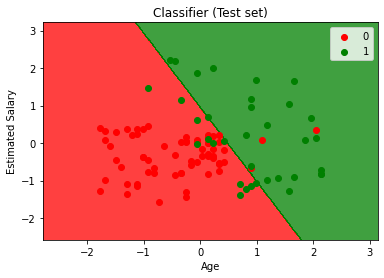

In [122]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
     
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()